# Bagging Regressor

Z. W. Miller - Copyright 2018

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3


In [15]:
import sys 
sys.path.append('../..')
from zwml.tree_models import decision_tree_regressor
import collections
import pandas as pd
import numpy as np

class bagging_regressor:
    
    def __init__(self, n_trees = 10, max_depth=None):
        """
        Bagging regressor uses bootstrapping to generate n_trees different
        datasets and then applies a decision tree to each dataset. The final 
        prediction is an ensemble of all created trees.
        ---
        Params:
        n_trees (int): number of bootstrapped trees to grow for ensembling
        max_depth (int): maximum number of splits to make in each tree)
        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
    
    def get_bagged_data(self, X, y):
        """
        Chooses random rows to populate a bootstrapped dataset, with replacement.
        Maintains the correlation between X and y
        ---
        Input: X, y (arrays)
        Outputs: randomized X,y (arrays)
        """
        index = np.random.choice(np.arange(len(X)),len(X))
        return X[index], y[index]
    
    def pandas_to_numpy(self, x):
        """
        Checks if the input is a Dataframe or series, converts to numpy matrix for
        calculation purposes.
        ---
        Input: X (array, dataframe, or series)
        Output: X (array)
        """
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x)
    
    def fit(self, X, y):
        """
        Generates the bootstrapped data then uses the decision tree
        class to build a model on each bootstrapped dataset. Each tree
        is stored as part of the model for later use.
        ---
        Input: X, y (arrays, dataframe, or series)
        """
        X = self.pandas_to_numpy(X)
        y = self.pandas_to_numpy(y)
        for _ in range(self.n_trees):
            bagX, bagy = self.get_bagged_data(X,y)
            new_tree = decision_tree_regressor(max_depth=self.max_depth)
            new_tree.fit(bagX, bagy)
            self.trees.append(new_tree)
            
    def predict(self, X):
        """
        Uses the list of tree models built in the fit, doing a predict with each
        model. The final prediction uses the mode of all the trees predictions.
        ---
        Input: X (array, dataframe, or series)
        Output: Class ID (int)
        """
        X = self.pandas_to_numpy(X)
        self.predicts = []
        for tree in self.trees:
            self.predicts.append(tree.predict(X))
        self.pred_by_row = np.array(self.predicts).T
        
        ensemble_predict = []
        for row in self.pred_by_row:
            ensemble_predict.append(np.mean(row))
        return ensemble_predict
    
    def score(self, X, y):
        """
        Uses the predict method to measure the (negative)
        mean squared error of the model.
        ---
        In: X (list or array), feature matrix; y (list or array) labels
        Out: negative mean squared error (float)
        """
        pred = self.predict(X)
        return -1.* np.mean((np.array(pred)-np.array(y))**2)

# Let's try it out with a dataset

In [16]:
def get_data():
    x = np.linspace(-10,10,300)
    y = np.sin(x)
    return x, y

In [17]:
X,y = get_data()

In [18]:
from zwml.utilities import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [19]:
br = bagging_regressor(n_trees=2, max_depth=10)
br.fit(X_train, y_train)

/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
br.score(X_test,y_test)

-0.022242994755079352

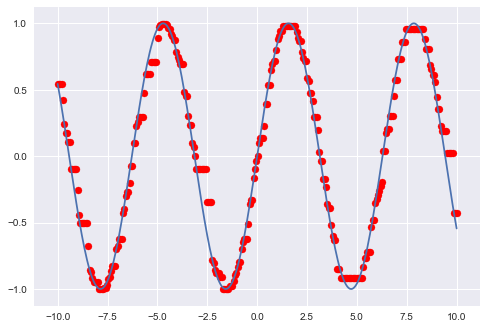

In [21]:
plt.plot(X,y)
plt.scatter(X, br.predict(X), c='r')

# Now let's play with some more complicated data

In [22]:
from sklearn.datasets import load_boston
X = load_boston().data
y = load_boston().target

In [18]:
from zwml.utilities import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [23]:
rf = bagging_regressor(n_trees=10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-0.014933442560530618